# Figure 5B: Restrict gene list by KEGG pathways

In [1]:
%load_ext autoreload
%autoreload 2

from utils.prediction_models import *
from kegg_utils import *

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['figure.dpi'] = 200

In [3]:
DIR_data="/home/zeqianli/project/zeqian/Carbon/data"
zeqian=pd.read_pickle(f"{DIR_data}/zeqian/zeqian.pk")
matti=pd.read_pickle(f"{DIR_data}/matti/matti.pk")
bacdive=pd.read_pickle(f"{DIR_data}/bacdive/bacdive.pk")
datasets={"zeqian":zeqian,"matti":matti,"bacdive":bacdive,}

# Scrape KEGG data

In [ ]:
DIR_kegg="/home/zeqianli/project/zeqian/Carbon/data/kegg"

### Pathways

In [ ]:
pathways=pd.read_csv(os.path.join(DIR_kegg,"pathway_list.txt"),header=None).values.flatten()

In [ ]:
# kos 
kos=Kegg.download_csv(["link/ko",*pathways],labels=['pathway','ko'])
kos['pathway']=kos['pathway'].str.replace("path:","")
kos['ko']=kos['ko'].str.replace("ko:","")

for _, pathway, ko in kos.itertuples():
    if not os.path.exists(os.path.join(DIR_kegg,"kos",ko)):
        with open(os.path.join(DIR_kegg,"kos",ko),'w') as f:
            pass # create an empty file
    
    if not os.path.exists(os.path.join(DIR_kegg,"pathways",pathway)):
        os.makedirs(os.path.join(DIR_kegg,"pathways",pathway))
    with open(os.path.join(DIR_kegg,"pathways",pathway,'kos.txt'),'a') as f:
        f.write(ko)
        f.write('\n')

In [ ]:
# modules
#modules=Kegg.download_csv(["link/module",*pathways],labels=['pathway','module'])
modules=pd.read_csv('http://rest.kegg.jp/list/module',sep='\t+',header=None,names=['module','module_name'])
# modules['pathway']=modules['pathway'].str.replace("path:","")
modules['module']=modules['module'].str.replace("md:","")

for _, pathway, module in modules.itertuples():
    if not os.path.exists(os.path.join(DIR_kegg,"modules",module)):
        os.makedirs(os.path.join(DIR_kegg,"modules",module))
    
    if not os.path.exists(os.path.join(DIR_kegg,"pathways",pathway)):
        os.makedirs(os.path.join(DIR_kegg,"pathways",pathway))
    with open(os.path.join(DIR_kegg,"pathways",pathway,'modules.txt'),'a') as f:
        f.write(module)
        f.write('\n')

In [ ]:
# modules
#modules=Kegg.download_csv(["link/module",*pathways],labels=['pathway','module'])
modules=pd.read_csv('http://rest.kegg.jp/list/module',sep='\t+',header=None,names=['module','module_name'])
# modules['pathway']=modules['pathway'].str.replace("path:","")
modules['module']=modules['module'].str.replace("md:","")

for _, module,_ in modules.itertuples():
    if not os.path.exists(os.path.join(DIR_kegg,"modules",module)):
        os.makedirs(os.path.join(DIR_kegg,"modules",module))
    
    # if not os.path.exists(os.path.join(DIR_kegg,"pathways",pathway)):
    #     os.makedirs(os.path.join(DIR_kegg,"pathways",pathway))
    # with open(os.path.join(DIR_kegg,"pathways",pathway,'modules.txt'),'a') as f:
    #     f.write(module)
    #     f.write('\n')

In [ ]:
# reactions
reactions=Kegg.download_csv(["link/reaction",*pathways],labels=['pathway','reaction'])
reactions['pathway']=reactions['pathway'].str.replace("path:","")
reactions['reaction']=reactions['reaction'].str.replace("rn:","")

for _, pathway, reaction in reactions.itertuples():
    if not os.path.exists(os.path.join(DIR_kegg,"reactions",reaction)):
        os.makedirs(os.path.join(DIR_kegg,"reactions",reaction))
    
    if not os.path.exists(os.path.join(DIR_kegg,"pathways",pathway)):
        os.makedirs(os.path.join(DIR_kegg,"pathways",pathway))
    with open(os.path.join(DIR_kegg,"pathways",pathway,'reactions.txt'),'a') as f:
        f.write(reaction)
        f.write('\n')

In [ ]:
# compounds
compounds=Kegg.download_csv(["link/compound",*pathways],labels=['pathway','compound'])
compounds['pathway']=compounds['pathway'].str.replace("path:","")
compounds['compound']=compounds['compound'].str.replace("cpd:","")

for _, pathway, compound in compounds.itertuples():
    if not os.path.exists(os.path.join(DIR_kegg,"compounds",compound)):
        with open(os.path.join(DIR_kegg,"compounds",compound),'w') as f:
            pass # create an empty file
    
    if not os.path.exists(os.path.join(DIR_kegg,"pathways",pathway)):
        os.makedirs(os.path.join(DIR_kegg,"pathways",pathway))
    with open(os.path.join(DIR_kegg,"pathways",pathway,'compounds.txt'),'a') as f:
        f.write(compound)
        f.write('\n')

### Modules

In [ ]:
modules=os.listdir(os.path.join(DIR_kegg,"modules"))

compounds=Kegg.download_csv(["link/compound",*modules],labels=['module','compound'])
compounds['module']=compounds['module'].str.replace("md:","")
compounds['compound']=compounds['compound'].str.replace("cpd:","")

for _, module, compound in compounds.itertuples():
    with open(os.path.join(DIR_kegg,"modules",module,'compounds.txt'),'a') as f:
        f.write(compound)
        f.write('\n')

kos=Kegg.download_csv(["link/ko",*modules],labels=['module','ko'])
kos['module']=kos['module'].str.replace("md:","")
kos['ko']=kos['ko'].str.replace("ko:","")

for _, module, ko in kos.itertuples():
    with open(os.path.join(DIR_kegg,"modules",module,'kos.txt'),'a') as f:
        f.write(ko)
        f.write('\n')

reactions=Kegg.download_csv(["link/reaction",*modules],labels=['module','reaction'])
reactions['module']=reactions['module'].str.replace("md:","")
reactions['reaction']=reactions['reaction'].str.replace("rn:","")

for _, module, reaction in reactions.itertuples():
    with open(os.path.join(DIR_kegg,"modules",module,'reactions.txt'),'a') as f:
        f.write(reaction)
        f.write('\n')

### Reactions

In [ ]:
reactions=os.listdir(os.path.join(DIR_kegg,"reactions"))

compounds=Kegg.download_csv(["link/compound",*reactions],labels=['reaction','compound'])
compounds['reaction']=compounds['reaction'].str.replace("rn:","")
compounds['compound']=compounds['compound'].str.replace("cpd:","")

for _, reaction, compound in compounds.itertuples():
    with open(os.path.join(DIR_kegg,"reactions",reaction,'compounds.txt'),'a') as f:
        f.write(compound)
        f.write('\n')

kos=Kegg.download_csv(["link/ko",*reactions],labels=['reaction','ko'])
kos['reaction']=kos['reaction'].str.replace("rn:","")
kos['ko']=kos['ko'].str.replace("ko:","")

for _, reaction, ko in kos.itertuples():
    with open(os.path.join(DIR_kegg,"reactions",reaction,'kos.txt'),'a') as f:
        f.write(ko)
        f.write('\n')



### Full text

In [ ]:
import requests

# pathways

pathways=os.listdir(os.path.join(DIR_kegg,"pathways"))
for pathway in tqdm(pathways,desc="Retriving pathway information"):
    try:
        res=requests.get(f"http://rest.kegg.jp/get/{pathway}")
        if not bool(res):
            raise ValueError
        with open(os.path.join(DIR_kegg,"pathways",pathway,pathway),'w') as f:
            f.write(res.text)
    except Exception as e:
        print("Failed: ",pathway)
        continue

In [ ]:
# modules

modules=os.listdir(os.path.join(DIR_kegg,"modules"))
for module in tqdm(modules, desc="Retriving module information"):
    try:
        res=requests.get(f"http://rest.kegg.jp/get/{module}")
        if not bool(res):
            raise ValueError
        with open(os.path.join(DIR_kegg,"modules",module,module),'w') as f:
            f.write(res.text)
    except Exception as e:
        print("Failed: ",module)
        continue

In [ ]:
# reactions

reactions=os.listdir(os.path.join(DIR_kegg,"reactions"))
for reaction in tqdm(reactions, desc="Retriving reaction information"):
    try:
        res=requests.get(f"http://rest.kegg.jp/get/{reaction}")
        if not bool(res):
            raise ValueError
        with open(os.path.join(DIR_kegg,"reactions",reaction,reaction),'w') as f:
            f.write(res.text)
    except Exception as e:
        print("Failed: ",reaction)
        continue

In [ ]:
# kos

kos=os.listdir(os.path.join(DIR_kegg,"kos"))
for ko in tqdm(kos, desc="Retriving ko information"):
    try:
        res=requests.get(f"http://rest.kegg.jp/get/{ko}")
        if not bool(res):
            raise ValueError
        with open(os.path.join(DIR_kegg,"kos",ko),'w') as f:
            f.write(res.text)
    except Exception as e:
        print("Failed: ",ko)
        continue

### Parse reaction graph

In [ ]:
# From reaction texts. Use the EQUATION field
import re

def parse_reaction(text):
    text=re.findall(r"EQUATION\s+(.+)\n",text)[0].strip()
    try:
        lefts,rights=text.split("<=>")
    except ValueError:
        try:
            lefts,rights=text.split("=>")
        except ValueError:
            rights,lefts=text.split("<=")
    lefts=lefts.strip()
    lefts=[re.findall('C\d+',l)[0] for l in lefts.split("+") if re.findall('C\d+',l)]
    rights=rights.strip()
    rights=[re.findall('C\d+',r)[0] for r in rights.split("+") if re.findall('C\d+',r)]
    return lefts,rights


def parse_module(text):
    out=[]
    text=re.findall(r"REACTION\s+([RC\d,->\n\s\+]+)\nCOMPOUND",text)
    if text:
        text=text[0].strip()
    else:
        print('Failed')
        return out
    for line in text.split("\n"):
        line=line.strip()
        if len(line)==0:
            continue
        rs=re.findall('[R\d, ]+',line)[0]
        lefts=re.findall('[C\d, \+]+->',line)[0]
        rights=re.findall('->[C\d, \+]+',line)[0]

        rs=[re.findall('R\d+',r)[0] for r in re.split(r'[\+,]',rs.strip()) if re.findall('R\d+',r)]
        lefts=[re.findall('C\d+',l)[0] for l in lefts.strip().split('+') if re.findall('C\d+',l)]
        rights=[re.findall('C\d+',r)[0] for r in rights.strip().split('+') if re.findall('C\d+',r)]
        out.append((rs,lefts,rights))
    return out


In [ ]:
# reaction graph 

with open(os.path.join(DIR_kegg, 'reaction_graph_raw.txt'),'w') as f_graph:
    for reaction in tqdm(os.listdir(os.path.join(DIR_kegg,'reactions')), desc="Building reaction graph..."):
        try:
            with open(os.path.join(DIR_kegg,"reactions",reaction,reaction),'r') as f:
                text=f.read()
            lefts, rights=parse_reaction(text)
            for left in lefts:
                for right in rights:
                    f_graph.write(f"{reaction}\t{left}\t{right}\n")
        except Exception as e:
            print("Failed: ",reaction)
            print(e)
            continue

In [ ]:
# module graph

with open(os.path.join(DIR_kegg, 'module_graph_raw.txt'),'w') as f_graph:
    for module in tqdm(os.listdir(os.path.join(DIR_kegg,'modules')), desc="Building module graph..."):
        try:
            with open(os.path.join(DIR_kegg,"modules",module,module),'r') as f:
                text=f.read()
            for rs, lefts, rights in parse_module(text):
                for left in lefts:
                    for right in rights:
                        f_graph.write(f"{','.join(rs)}\t{left}\t{right}\n")
        except Exception as e:
            print("Error parsing ", module)
            raise e


In [ ]:
import networkx as nx


with open(os.path.join(DIR_kegg,'ignore_compounds.txt'),'r') as f:
    ignore_compounds=[re.findall(r'C\d+',line)[0] for line in f.readlines() if line.strip()]


In [ ]:
edges=pd.read_csv(os.path.join(DIR_kegg, 'reaction_graph_raw.txt'), sep='\t', header=None,names=['reaction','c1','c2'])
edges=edges[(~edges['c1'].isin(ignore_compounds)) & (~edges['c2'].isin(ignore_compounds))]
edges=edges.drop_duplicates()
edges['c1_c2']=edges['c1']+'_'+edges['c2']
edges['c1_c2_undirected']=edges[['c1','c2']].apply(lambda x: '_'.join(sorted(x)), axis=1)

edges_directed=edges.groupby('c1_c2')['reaction'].apply(lambda x: ','.join(x)).reset_index()
edges_directed['c1']=edges_directed['c1_c2'].apply(lambda x: x.split('_')[0])
edges_directed['c2']=edges_directed['c1_c2'].apply(lambda x: x.split('_')[1])
edges_directed['n_reactions']=edges_directed['reaction'].apply(lambda x: len(x.split(',')))


edges_undirected=edges.groupby('c1_c2_undirected')['reaction'].apply(lambda x: ','.join(x)).reset_index()
edges_undirected['c1']=edges_undirected['c1_c2_undirected'].apply(lambda x: x.split('_')[0])
edges_undirected['c2']=edges_undirected['c1_c2_undirected'].apply(lambda x: x.split('_')[1])
edges_undirected['n_reactions']=edges_undirected['reaction'].apply(lambda x: len(x.split(',')))

g_directed=nx.from_pandas_edgelist(edges_directed, source='c1',target='c2',edge_attr=['reaction'],create_using=nx.DiGraph)

with open(os.path.join(DIR_kegg,'reaction_graph_directed.pk'),'wb') as f:
    pickle.dump(g_directed,f)

g_undirected=nx.from_pandas_edgelist(edges_undirected, source='c1',target='c2',edge_attr=['reaction'],create_using=nx.Graph)

with open(os.path.join(DIR_kegg,'reaction_graph_undirected.pk'),'wb') as f:
    pickle.dump(g_undirected,f)

In [ ]:
edges=pd.read_csv(os.path.join(DIR_kegg, 'module_graph_raw.txt'), sep='\t', header=None,names=['reaction','c1','c2'])
edges=edges[(~edges['c1'].isin(ignore_compounds)) & (~edges['c2'].isin(ignore_compounds))]
edges=edges.drop_duplicates()
edges['c1_c2']=edges['c1']+'_'+edges['c2']
edges['c1_c2_undirected']=edges[['c1','c2']].apply(lambda x: '_'.join(sorted(x)), axis=1)

edges_directed=edges.groupby('c1_c2')['reaction'].apply(lambda x: ','.join(x)).reset_index()
edges_directed['c1']=edges_directed['c1_c2'].apply(lambda x: x.split('_')[0])
edges_directed['c2']=edges_directed['c1_c2'].apply(lambda x: x.split('_')[1])
edges_directed['n_reactions']=edges_directed['reaction'].apply(lambda x: len(x.split(',')))


edges_undirected=edges.groupby('c1_c2_undirected')['reaction'].apply(lambda x: ','.join(x)).reset_index()
edges_undirected['c1']=edges_undirected['c1_c2_undirected'].apply(lambda x: x.split('_')[0])
edges_undirected['c2']=edges_undirected['c1_c2_undirected'].apply(lambda x: x.split('_')[1])
edges_undirected['n_reactions']=edges_undirected['reaction'].apply(lambda x: len(x.split(',')))

g_directed=nx.from_pandas_edgelist(edges_directed, source='c1',target='c2',edge_attr=['reaction'],create_using=nx.DiGraph)

with open(os.path.join(DIR_kegg,'module_graph_directed.pk'),'wb') as f:
    pickle.dump(g_directed,f)

g_undirected=nx.from_pandas_edgelist(edges_undirected, source='c1',target='c2',edge_attr=['reaction'],create_using=nx.Graph)

with open(os.path.join(DIR_kegg,'module_graph_undirected.pk'),'wb') as f:
    pickle.dump(g_undirected,f)

#### Find top k paths

In [ ]:
g=pd.read_pickle(os.path.join(DIR_kegg,'reaction_graph_directed.pk'))
endpoints=pd.read_csv(os.path.join(DIR_kegg, 'endpoint_compounds.txt'),sep='\t',header=None).iloc[:,0].values
carbons=pd.read_csv(os.path.join(DIR_kegg, 'zeqian_compounds.txt'),sep='\t',header=None).iloc[:,0].values



# Identify KOs related to a carbon compound

In [ ]:
DIR_kegg="/home/zeqianli/project/zeqian/Carbon/data/kegg"

In [ ]:
import networkx as nx 
import itertools
def find_reactions(g, source, target, k=1,cutoff=100, remove_target_interlinks=True):
    if isinstance(source, str):
        source=[source]
    if isinstance(target, str):
        target=[target]
    if remove_target_interlinks:
        g=g.copy()
        for t1, t2 in itertools.permutations(target,2):
            if g.has_edge(t1,t2):
                g.remove_edge(t1,t2)
    
    paths=[]
    for s in source:
        for t in target:
            try:
                for i, path in enumerate(nx.shortest_simple_paths(g, s, t)):
                    if i>=k:
                        break
                    paths.append(path)
            except nx.NodeNotFound:
                continue
            except nx.NetworkXNoPath:
                continue

    
    #print(paths)
    path_lengths=[len(p) for p in paths]
    _ind=np.argsort(path_lengths)[:k]
    paths=[paths[i] for i in _ind]

    reactions=[]
    for path in paths:
        for s,t in zip(path[:-1],path[1:]):
            rs=g[s][t]['reaction'].split(',')
            reactions.extend(rs)
    return reactions,paths


In [ ]:
def find_kos(c,level, subset=None):
    
    if subset is None:
        subset=[]
        for l in os.listdir(os.path.join(DIR_kegg, level)):
            try:
                cs=pd.read_csv(os.path.join(DIR_kegg, level, l,'compounds.txt'),header=None).values.flatten()
                if c in cs:
                    subset.append(l)
            except FileNotFoundError:
                continue
    kos=[]
    for l in subset:
        try:
            kos.extend(pd.read_csv(os.path.join(DIR_kegg, level, l,'kos.txt'),header=None).values.flatten()) 
        except FileNotFoundError:
            continue
    
    return np.unique(kos)


In [ ]:
g_directed=pd.read_pickle(os.path.join(DIR_kegg,'reaction_graph_directed.pk'))
g_undirected=pd.read_pickle(os.path.join(DIR_kegg,'reaction_graph_undirected.pk'))
endpoints=pd.read_csv(os.path.join(DIR_kegg, 'endpoint_compounds.txt'),sep='\t',header=None).iloc[:,0].values
carbons=pd.read_csv(os.path.join(DIR_kegg, 'zeqian_compounds.txt'),sep='\t',header=None).iloc[:,0].values
carbon_names=pd.read_csv(os.path.join(DIR_kegg, 'zeqian_compounds.txt'),sep='\t',header=None).iloc[:,1].values

df=[]
ks=1,2,3



for c in carbons:
    out={'carbon':c}

    out['by_pathway']=find_kos(c,'pathways')
    out['by_module']=find_kos(c,'modules')
    out['by_reaction']=find_kos(c,'reactions')

    for k in ks:
        # KOs by shorted path, directed
        reactions,paths=find_reactions(g_directed, c, endpoints, k=k)
        out[f'by_k{k}_path_directed']=find_kos(c,'reactions', subset=reactions)

        # KOs by shorted path, undirected
        reactions,paths=find_reactions(g_undirected, c, endpoints, k=k)
        out[f'by_k{k}_path_undirected']=find_kos(c,'reactions', subset=reactions)

    df.append(out)

df=pd.DataFrame(df)
df['carbon_names']=carbon_names
df.set_index('carbon_names',inplace=True)

In [ ]:
df.to_pickle(f"{DIR_kegg}/zeqian_kos_by_kegg.pk")

In [ ]:
# Display gene counts
df.applymap(len).drop('carbon',axis=1)

# Prediction models

In [10]:
DIR_data="/home/zeqianli/project/zeqian/Carbon/data"
zeqian=pd.read_pickle(f"{DIR_data}/zeqian/zeqian.pk")
matti=pd.read_pickle(f"{DIR_data}/matti/matti.pk")
bacdive=pd.read_pickle(f"{DIR_data}/bacdive/bacdive.pk")
datasets={"zeqian":zeqian,"matti":matti,"bacdive":bacdive,}

# bacdive_sim=pd.read_pickle("/home/zeqianli/project/zeqianli/Kuehn/Carbon/data/20221031_bacdive_simulated_data.pk")

In [4]:
# Zeqian data 
DIR_kegg="/home/zeqianli/project/zeqian/Carbon/data/kegg"
ko_data, growth_data, tree,samples=zeqian['ko_data'], zeqian['growth_data'], zeqian['tree'], zeqian['samples']
ko_list=pd.read_pickle(f"{DIR_kegg}/zeqian_kos_by_kegg.pk").drop(['carbon','by_module'],axis=1)

In [8]:
ko_selected_si=ko_list[['by_pathway','by_k3_path_directed','by_reaction']].copy()
ko_selected_si.columns=['Pathway','Paths to central metabolism','Reaction']
ko_selected_si.to_csv("/home/zeqianli/project/zeqian/Carbon/data/kegg/ko_selection_si.csv")

In [12]:
# Model: Null, NN + selected features, RF + selected features, 
#threads=28
threads=1
models={'null': [BernoulliNull,{}],
        'identity_null': [IdentityNull,{}],
        'NN':[NearestNeighbor,{'n_neighbors':1}],
        'RF_None_sqrt':[RF,{'n_estimators':100,'max_depth':None, 'max_features': 'sqrt'}],
        'RF_None_None':[RF,{'n_estimators':100,'max_depth':None, 'max_features': None}],
        }
        # 'NN': [NearestNeighbor,None], "LogisticRegression":[LassoLogisticRegression,{'C':1.0, 'penalty':'l1','solver':'liblinear'}]}

split_params={'random': {
                 'split_method':'random',
                 'splitter_params': {'test_set_ratio':0.2}, 
                 'n_splits':100,
                 'threads': threads,
                 'save_models':False
                 },
        'ooc': {
                 'split_method':'ooc',
                 'splitter_params': {'test_set_range':(0.1,0.3), 'min_zeros':0, 'min_ones':0, 'time_out_iter':None}, 
                 'n_splits':100,
                 'threads': threads,
                 'save_models':False
                 }
        }

In [13]:
class SelectedFeatures(BinaryGrowthClassifier):
    def __init__(self, Model, model_params, selected_features):
        self.Model=Model
        self.model_params=model_params
        self.selected_features=selected_features
        self._model=None
    def fit(self, X, y):
        self._model=self.Model(**self.model_params)
        self._model.fit(X.loc[:,self.selected_features],y)
    
    def predict(self, X):
        return self._model.predict(X.loc[:,self.selected_features])
    
    def get_params(self, deep=True):
        out={'model_name':self.Model.__name__, 'selected_features':self.selected_features}
        out.update(self._model.get_params())
        return out

## Start the run

In [14]:
# p=Pool(threads)
p=None

In [15]:
dataset_name='zeqian'
dataset=datasets[dataset_name]

for model_name, (Model, model_params) in models.items():
    for split_name,split_param in split_params.items():
        for ko_selection_level in ko_list.columns:
            try:

                print(f"Running {split_name} {model_name} {dataset_name} {ko_selection_level}")
                ff_cache=f"{DIR_data}/figure_data/4A/cache/{split_name}_{model_name}_{dataset_name}_{ko_selection_level}.pk"
                ff_results=f"{DIR_data}/figure_data/4A/{split_name}_{model_name}_{dataset_name}_{ko_selection_level}.pk"
                
                if os.path.exists(ff_results):
                    print("Already done. Skipping. ")
                    continue

                ko_data,growth_data, tree,carbons=dataset['ko_data'],dataset['growth_data'],dataset['tree'],dataset['carbons']
                


                fs_model_params={}
                for c in carbons:
                    selected_features=np.intersect1d(ko_data.columns, ko_list.at[c,ko_selection_level])
                    if len(selected_features)==0:
                        continue
                    else: 
                        fs_model_params[c]={'Model':Model, 'model_params':model_params, 'selected_features':selected_features}
                if len(fs_model_params)==0:
                    print("No selected features. Skipping. ")
                    continue

                pipe=PredictionPipeline(SelectedFeatures,
                        model_params=fs_model_params, 
                        tree=tree, 
                        carbons=list(fs_model_params.keys()), 
                        p=p,  
                        ff_results=ff_cache,
                        **split_param)
                pipe.generate_splits(ko_data,growth_data)
                results=pipe.run()
                with open(ff_results, 'wb') as f:
                    pickle.dump(results, f)
                print(f"Finished {split_name} {model_name} {dataset_name} {ko_selection_level}")

            except Exception as e: 
                print(e)
                print(f"Failed to run {split_name} {model_name} {dataset_name} {ko_selection_level}")





Running random null zeqian by_pathway
Already done. Skipping. 
Running random null zeqian by_reaction
Already done. Skipping. 
Running random null zeqian by_k1_path_directed
Already done. Skipping. 
Running random null zeqian by_k1_path_undirected
Already done. Skipping. 
Running random null zeqian by_k2_path_directed
Already done. Skipping. 
Running random null zeqian by_k2_path_undirected
Already done. Skipping. 
Running random null zeqian by_k3_path_directed
Already done. Skipping. 
Running random null zeqian by_k3_path_undirected
Already done. Skipping. 
Running ooc null zeqian by_pathway
Already done. Skipping. 
Running ooc null zeqian by_reaction
Already done. Skipping. 
Running ooc null zeqian by_k1_path_directed
Already done. Skipping. 
Running ooc null zeqian by_k1_path_undirected
Already done. Skipping. 
Running ooc null zeqian by_k2_path_directed
Already done. Skipping. 
Running ooc null zeqian by_k2_path_undirected
Already done. Skipping. 
Running ooc null zeqian by_k3_path

Training models...: 100%|██████████| 1000/1000 [00:02<00:00, 338.51it/s]


Finished random identity_null zeqian by_pathway
Running random identity_null zeqian by_reaction


Training models...: 100%|██████████| 1000/1000 [00:02<00:00, 355.18it/s]


Finished random identity_null zeqian by_reaction
Running random identity_null zeqian by_k1_path_directed


Training models...: 100%|██████████| 700/700 [00:01<00:00, 356.87it/s]


Finished random identity_null zeqian by_k1_path_directed
Running random identity_null zeqian by_k1_path_undirected


Training models...: 100%|██████████| 700/700 [00:01<00:00, 353.16it/s]


Finished random identity_null zeqian by_k1_path_undirected
Running random identity_null zeqian by_k2_path_directed


Training models...: 100%|██████████| 800/800 [00:02<00:00, 354.15it/s]


Finished random identity_null zeqian by_k2_path_directed
Running random identity_null zeqian by_k2_path_undirected


Training models...: 100%|██████████| 900/900 [00:02<00:00, 354.42it/s]


Finished random identity_null zeqian by_k2_path_undirected
Running random identity_null zeqian by_k3_path_directed


Training models...: 100%|██████████| 800/800 [00:02<00:00, 354.00it/s]


Finished random identity_null zeqian by_k3_path_directed
Running random identity_null zeqian by_k3_path_undirected


Training models...: 100%|██████████| 900/900 [00:02<00:00, 318.53it/s]


Finished random identity_null zeqian by_k3_path_undirected
Running ooc identity_null zeqian by_pathway


Training models...: 100%|██████████| 1000/1000 [00:02<00:00, 335.85it/s]


Finished ooc identity_null zeqian by_pathway
Running ooc identity_null zeqian by_reaction


Training models...: 100%|██████████| 1000/1000 [00:02<00:00, 348.06it/s]


Finished ooc identity_null zeqian by_reaction
Running ooc identity_null zeqian by_k1_path_directed


Training models...: 100%|██████████| 700/700 [00:02<00:00, 346.94it/s]


Finished ooc identity_null zeqian by_k1_path_directed
Running ooc identity_null zeqian by_k1_path_undirected


Training models...: 100%|██████████| 700/700 [00:02<00:00, 345.23it/s]


Finished ooc identity_null zeqian by_k1_path_undirected
Running ooc identity_null zeqian by_k2_path_directed


Training models...: 100%|██████████| 800/800 [00:02<00:00, 343.83it/s]


Finished ooc identity_null zeqian by_k2_path_directed
Running ooc identity_null zeqian by_k2_path_undirected


Training models...: 100%|██████████| 900/900 [00:02<00:00, 344.35it/s]


Finished ooc identity_null zeqian by_k2_path_undirected
Running ooc identity_null zeqian by_k3_path_directed


Training models...: 100%|██████████| 800/800 [00:02<00:00, 346.41it/s]


Finished ooc identity_null zeqian by_k3_path_directed
Running ooc identity_null zeqian by_k3_path_undirected


Training models...: 100%|██████████| 900/900 [00:02<00:00, 347.62it/s]


Finished ooc identity_null zeqian by_k3_path_undirected
Running random NN zeqian by_pathway
Already done. Skipping. 
Running random NN zeqian by_reaction
Already done. Skipping. 
Running random NN zeqian by_k1_path_directed
Already done. Skipping. 
Running random NN zeqian by_k1_path_undirected
Already done. Skipping. 
Running random NN zeqian by_k2_path_directed
Already done. Skipping. 
Running random NN zeqian by_k2_path_undirected
Already done. Skipping. 
Running random NN zeqian by_k3_path_directed
Already done. Skipping. 
Running random NN zeqian by_k3_path_undirected
Already done. Skipping. 
Running ooc NN zeqian by_pathway
Already done. Skipping. 
Running ooc NN zeqian by_reaction
Already done. Skipping. 
Running ooc NN zeqian by_k1_path_directed
Already done. Skipping. 
Running ooc NN zeqian by_k1_path_undirected
Already done. Skipping. 
Running ooc NN zeqian by_k2_path_directed
Already done. Skipping. 
Running ooc NN zeqian by_k2_path_undirected
Already done. Skipping. 
Runnin

# Plot results

In [7]:
## Load data
DIR_data="/home/zeqianli/project/zeqian/Carbon/data"
zeqian=pd.read_pickle(f"{DIR_data}/zeqian/zeqian.pk")
ko_data, growth_data, tree,samples=zeqian['ko_data'], zeqian['growth_data'], zeqian['tree'], zeqian['samples']


DIR_kegg="/home/zeqianli/project/zeqian/Carbon/data/kegg"
DIR_results=f"{DIR_data}/figure_data/4A/"
ko_list=pd.read_pickle(f"{DIR_kegg}/zeqian_kos_by_kegg.pk").drop(['carbon','by_module'],axis=1)

# Model: Null, NN + selected features, RF + selected features, 
#threads=28
threads=1
models={'null': [BernoulliNull,{}],
        'identity_null': [IdentityNull,{}],
        'NN':[NearestNeighbor,{'n_neighbors':1}],
        'RF_None_sqrt':[RF,{'n_estimators':100,'max_depth':None, 'max_features': 'sqrt'}],
        'RF_None_None':[RF,{'n_estimators':100,'max_depth':None, 'max_features': None}],
        }
        # 'NN': [NearestNeighbor,None], "LogisticRegression":[LassoLogisticRegression,{'C':1.0, 'penalty':'l1','solver':'liblinear'}]}

split_params={'random': {
                 'split_method':'random',
                 'splitter_params': {'test_set_ratio':0.2}, 
                 'n_splits':100,
                 'threads': threads,
                 'save_models':False
                 },
        'ooc': {
                 'split_method':'ooc',
                 'splitter_params': {'test_set_range':(0.1,0.3), 'min_zeros':0, 'min_ones':0, 'time_out_iter':None}, 
                 'n_splits':100,
                 'threads': threads,
                 'save_models':False
                 }
        }

import itertools

parameters=list(itertools.product(list(split_params.keys()), list(models.keys()), ['zeqian'],ko_list.columns))

In [17]:
results_all=[]
for parameter in parameters:
    results=pd.read_pickle(f"{DIR_results}/{'_'.join(parameter)}.pk")
    results['split']=parameter[0]
    results['model']=parameter[1]
    results['dataset']=parameter[2]
    results['ko_selection_level']=parameter[3]
    results_all.append(results)
results_all=pd.concat(results_all, axis=0, ignore_index=True)

In [18]:
results_all.to_pickle(os.path.join(DIR_results, 'results_all.pk'))

### Plot

In [4]:
# p-value
DIR_data="/home/zeqianli/project/zeqian/Carbon/data"
results_all=pd.read_pickle(f"{DIR_data}/figure_data/4A/results_all.pk")
results_all=results_all[results_all['model'].isin(['null','identity_null','RF_None_None'])]
results_all['model']=results_all['model'].replace({'RF_None_None':'RF'})
results_all['model']=results_all['model']+'_'+results_all['ko_selection_level']+'_'+results_all['split']


# stats.to_pickle(f"{DIR_data}/figure_data/4A/stat.pk")

In [5]:
model_pairs=[('RF_by_pathway_random','null_by_pathway_random'),
             ('RF_by_k3_path_directed_random','null_by_pathway_random'),
             ('RF_by_reaction_random','null_by_pathway_random'),
             ('RF_by_pathway_ooc','null_by_pathway_ooc'),
             ('RF_by_k3_path_directed_ooc','null_by_pathway_ooc'),
             ('RF_by_reaction_ooc','null_by_pathway_ooc'),
             ('RF_by_pathway_random','identity_null_by_pathway_random'),
             ('RF_by_k3_path_directed_random','identity_null_by_pathway_random'),
             ('RF_by_reaction_random','identity_null_by_pathway_random'),
             ('RF_by_pathway_ooc','identity_null_by_pathway_ooc'),
             ('RF_by_k3_path_directed_ooc','identity_null_by_pathway_ooc'),
             ('RF_by_reaction_ooc','identity_null_by_pathway_ooc')]
# model_pairs=['RF_by_pathway']

stats=compare_models(results_all, 
                    model_pairs=[(*p, ttest_permutation) for p in model_pairs],
                    seperate_by='carbon_name',
                    model_key='model',
                    metric='accuracy',
                    p_threshold=0.05,
                    multi_testing_correction='hs',correct_by='carbons')


100%|██████████| 10/10 [01:32<00:00,  9.27s/it]

Correcting p-values...



/home/zeqianli/scratch-midway3/miniconda3/envs/zeqian/lib/python3.11/site-packages/statsmodels/stats/multitest.py:176: RuntimeWarning: invalid value encountered in expm1
  pvals_corrected_raw = -np.expm1(np.arange(ntests, 0, -1) *
/home/zeqianli/scratch-midway3/miniconda3/envs/zeqian/lib/python3.11/site-packages/statsmodels/stats/multitest.py:176: RuntimeWarning: invalid value encountered in expm1
  pvals_corrected_raw = -np.expm1(np.arange(ntests, 0, -1) *


['null_by_pathway_ooc', 'identity_null_by_pathway_ooc']


/home/zeqianli/scratch-midway3/miniconda3/envs/zeqian/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


['null_by_pathway_ooc', 'identity_null_by_pathway_ooc']


/home/zeqianli/scratch-midway3/miniconda3/envs/zeqian/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


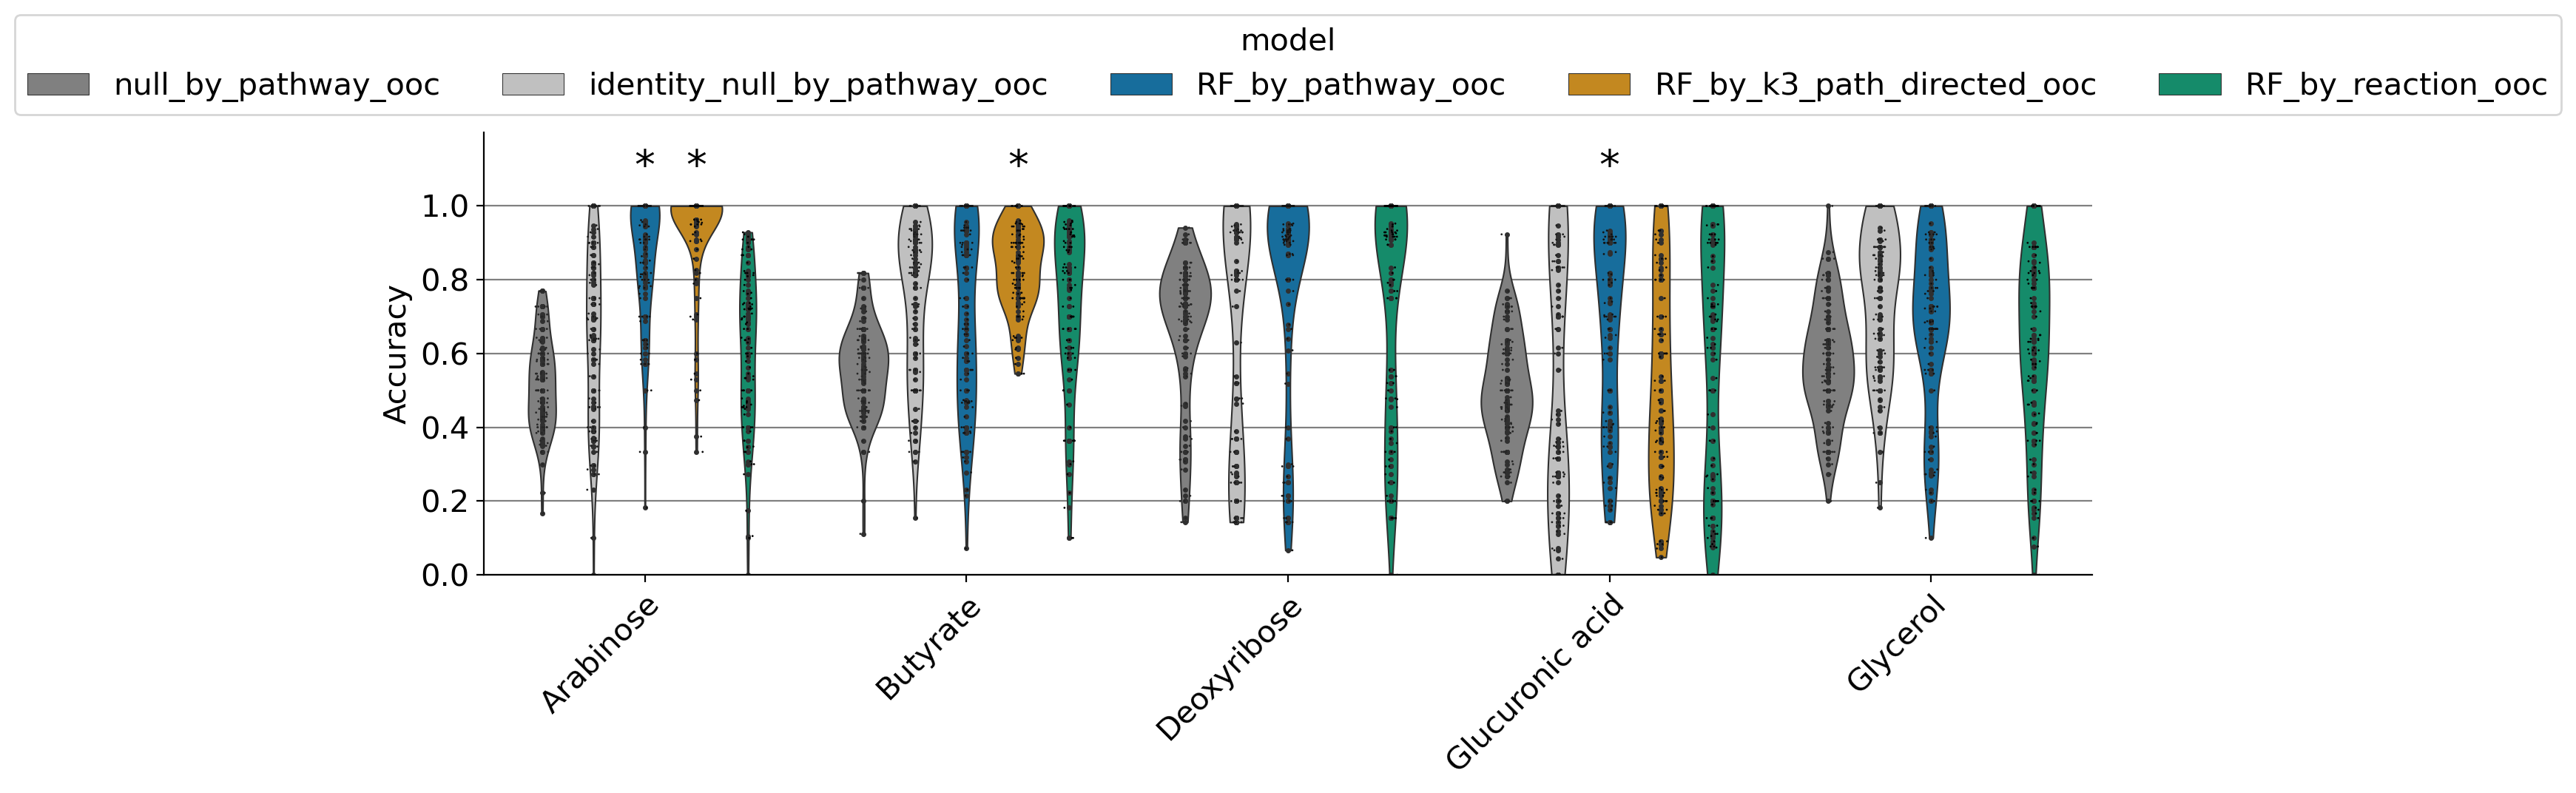

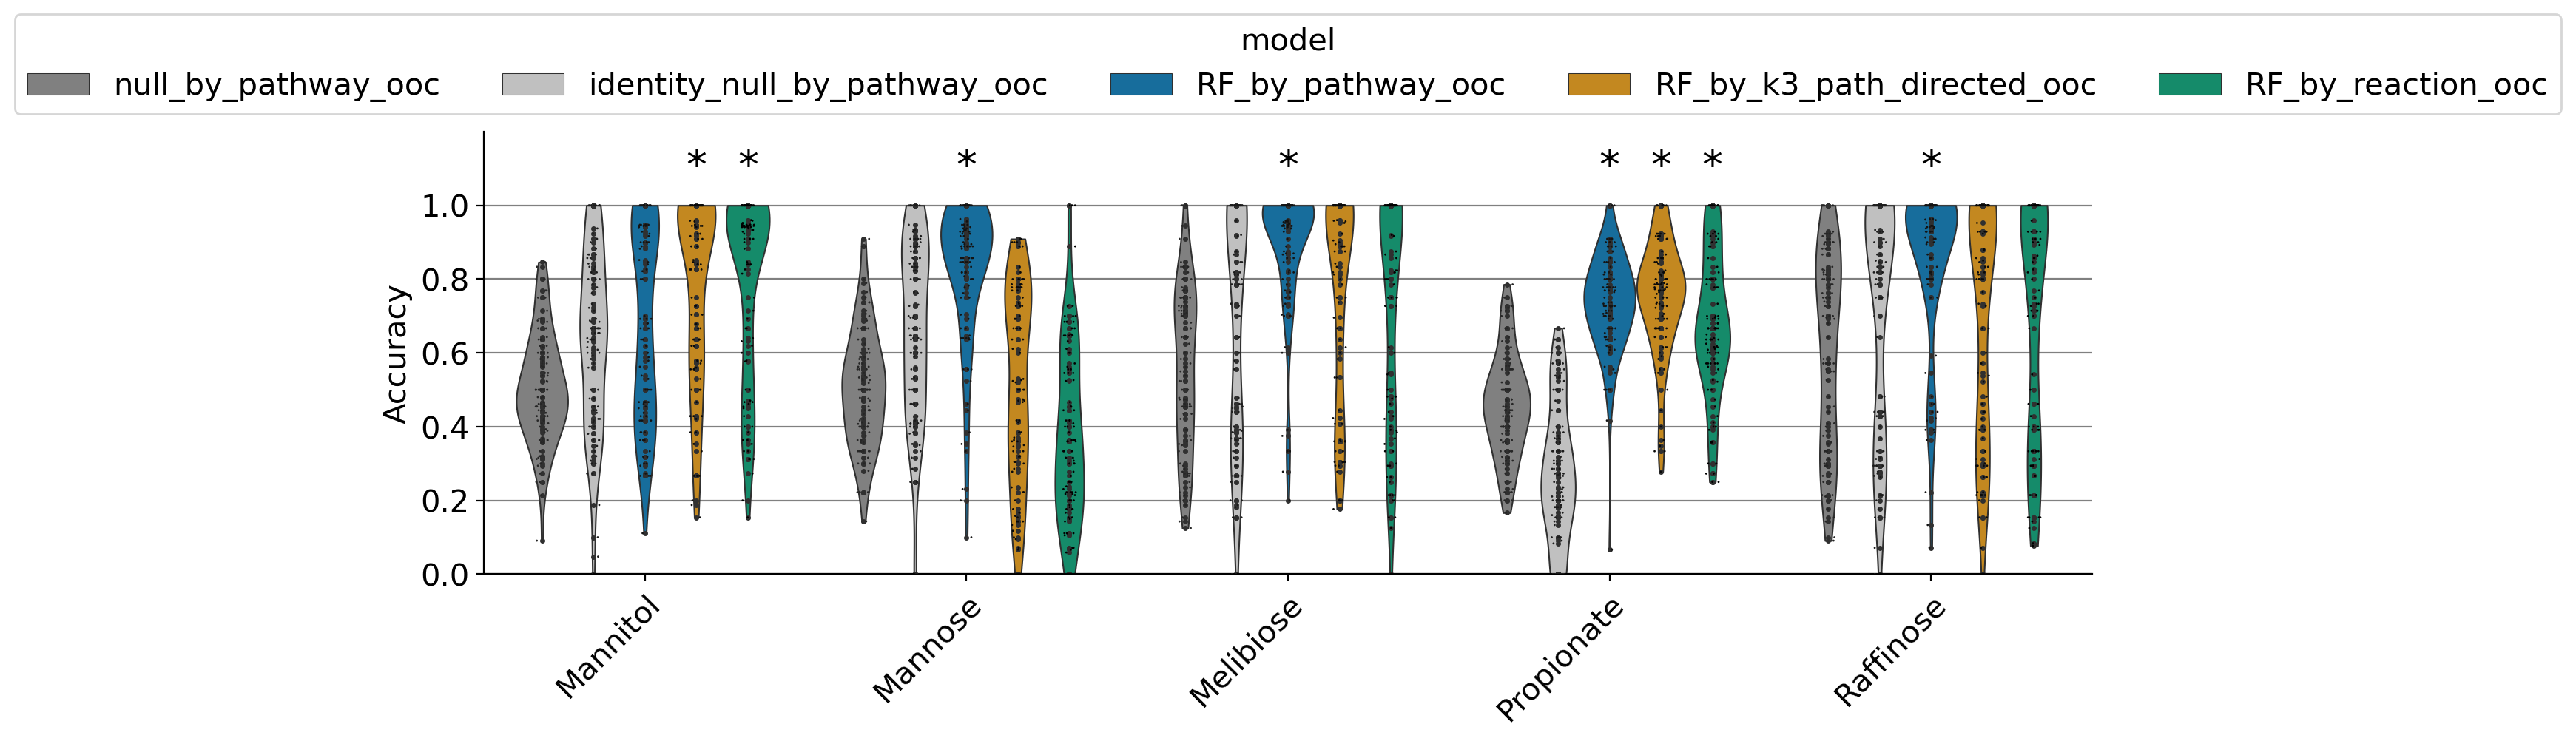

In [8]:
#hue_order=['null_by_pathway_random','identity_null_by_pathway_random','RF_by_pathway_random','RF_by_k3_path_directed_random','RF_by_reaction_random','null_by_pathway_ooc','identity_null_by_pathway_ooc','RF_by_pathway_ooc','RF_by_k3_path_directed_ooc','RF_by_reaction_ooc']
hue_order=['null_by_pathway_ooc','identity_null_by_pathway_ooc','RF_by_pathway_ooc','RF_by_k3_path_directed_ooc','RF_by_reaction_ooc']


fig1, stats=plot_fancy_model_comparison(results_all[results_all['carbon_name'].isin(CARBONS[:5])], hue_order=hue_order,stats=stats, model_pairs=model_pairs, multi_testing_correction=False, height=4, aspect=3,rotate_x=True, 
            single_annotation=True, show_null_model=True, pair_annotation=False, )
    
fig2, stats=plot_fancy_model_comparison(results_all[results_all['carbon_name'].isin(CARBONS[5:])], hue_order=hue_order,stats=stats, model_pairs=model_pairs, multi_testing_correction=False, height=4, aspect=3,rotate_x=True, 
            single_annotation=True, show_null_model=True, pair_annotation=False, )

for fig in [fig1,fig2]:
    fig.gca().set_ylabel('Accuracy')
    fig.gca().set_xlabel(None)
    # xlabel rotate 45, anchor

    fig.gca().set_xticklabels(fig.gca().get_xticklabels(), rotation=45, ha='right')

### Arabinose

In [9]:
arab=results_all[(results_all['carbon_name']=='Arabinose') & (results_all['model_name']=='RF') & (results_all['split']=='ooc') & (results_all['ko_selection_level']=='by_pathway')]
buty=results_all[(results_all['carbon_name']=='Butyrate') & (results_all['model_name']=='RF') & (results_all['split']=='ooc') & (results_all['ko_selection_level']=='by_k3_path_directed')]
gluc=results_all[(results_all['carbon_name']=='Glucuronic acid') & (results_all['model_name']=='RF') & (results_all['split']=='ooc') & (results_all['ko_selection_level']=='by_pathway')]
mann=results_all[(results_all['carbon_name']=='Mannose') & (results_all['model_name']=='RF') & (results_all['split']=='ooc') & (results_all['ko_selection_level']=='by_pathway')]
melib=results_all[(results_all['carbon_name']=='Melibiose') & (results_all['model_name']=='RF') & (results_all['split']=='ooc') & (results_all['ko_selection_level']=='by_pathway')]
raff=results_all[(results_all['carbon_name']=='Raffinose') & (results_all['model_name']=='RF') & (results_all['split']=='ooc') & (results_all['ko_selection_level']=='by_pathway')]
                                                    

In [13]:
arab

,carbon_name,train_samples,test_samples,model_name,selected_features,is_null_model,null_model,replace,true_negative,false_positive,false_negative,true_positive,accuracy,precision,sensitivity,specificity,f1_score,balanced_accuracy,train_sample_size,test_sample_size,split,model,dataset,ko_selection_level,identity_null_pred,n_neighbors,weights,metric,feature_importances
61200,Arabinose,"[HMWF001, HMWF003, HMWF005, HMWF006, HMWF008, ...","[HMWF018, HMWF029, sic0104, sic0702, sic1102, ...",RF,"[K00007, K00008, K00012, K00039, K00040, K0004...",NaN,NaN,NaN,1,1,0,10,0.916667,0.909091,1.0,0.500000,0.952381,0.750000,80,12,ooc,RF_by_pathway_ooc,zeqian,by_pathway,NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.00037712130735386557, 0..."
61201,Arabinose,"[HMWF001, HMWF003, HMWF005, HMWF006, HMWF008, ...","[HMWF009, HMWF018, HMWF025, HMWF029, OTU3971, ...",RF,"[K00007, K00008, K00012, K00039, K00040, K0004...",NaN,NaN,NaN,3,0,0,20,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,69,23,ooc,RF_by_pathway_ooc,zeqian,by_pathway,NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029700518832..."
61202,Arabinose,"[HMWF001, HMWF003, HMWF005, HMWF006, HMWF008, ...","[HMWF018, HMWF029, OTU3427, sib0404, sic0104, ...",RF,"[K00007, K00008, K00012, K00039, K00040, K0004...",NaN,NaN,NaN,4,0,0,9,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,79,13,ooc,RF_by_pathway_ooc,zeqian,by_pathway,NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0006245059288537549, 0...."
61203,Arabinose,"[HMWF001, HMWF003, HMWF005, HMWF006, HMWF008, ...","[OTU672, OTU736, pd19367, sic0404, sid0104, si...",RF,"[K00007, K00008, K00012, K00039, K00040, K0004...",NaN,NaN,NaN,2,0,0,12,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,78,14,ooc,RF_by_pathway_ooc,zeqian,by_pathway,NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.002667646453824932, 0.00412742518..."
61204,Arabinose,"[HMWF001, HMWF003, HMWF005, HMWF006, HMWF008, ...","[HMWF018, HMWF029, OTU3427, OTU736, sia0901, s...",RF,"[K00007, K00008, K00012, K00039, K00040, K0004...",NaN,NaN,NaN,14,0,0,7,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,71,21,ooc,RF_by_pathway_ooc,zeqian,by_pathway,NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015504028684..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61295,Arabinose,"[HMWF003, HMWF005, HMWF006, HMWF008, HMWF009, ...","[HMWF001, HMWF018, HMWF028, HMWF029, OTU3427, ...",RF,"[K00007, K00008, K00012, K00039, K00040, K0004...",NaN,NaN,NaN,11,3,0,8,0.863636,0.727273,1.0,0.785714,0.842105,0.892857,70,22,ooc,RF_by_pathway_ooc,zeqian,by_pathway,NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.002731643356643356, 0.0..."
61296,Arabinose,"[HMWF001, HMWF003, HMWF005, HMWF006, HMWF008, ...","[HMWF018, HMWF029, OTU3427, sib0404, sic0104, ...",RF,"[K00007, K00008, K00012, K00039, K00040, K0004...",NaN,NaN,NaN,5,0,0,9,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,78,14,ooc,RF_by_pathway_ooc,zeqian,by_pathway,NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0006759728540532478, 0...."
61297,Arabinose,"[HMWF001, HMWF003, HMWF005, HMWF006, HMWF008, ...","[OTU672, OTU736, pd19367, sic0404, sid0104, si...",RF,"[K00007, K00008, K00012, K00039, K00040, K0004...",NaN,NaN,NaN,6,0,0,12,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,74,18,ooc,RF_by_pathway_ooc,zeqian,by_pathway,NaN,NaN,NaN,NaN,"[0.0036960219793894743, 0.0, 0.001327074959672..."
61298,Arabinose,"[HMWF001, HMWF003, HMWF005, HMWF006, HMWF008, ...","[HMWF018, HMWF029, OTU3427, OTU736, sic0104, s...",RF,"[K00007, K00008, K00012, K00039, K00040, K0004...",NaN,NaN,NaN,11,0,0,7,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,74,18,ooc,RF_by_pathway_ooc,zeqian,by_pathway,NaN,NaN,NaN,NaN,"[0.0005659965034965037, 0.0, 0.0, 0.0, 0.0, 0...."


In [19]:
for arr in [arab,buty,gluc,mann,melib,raff]:
    fi=cal_feature_importance(arr,zeqian['ko_data'].loc[:,arr['selected_features'].iloc[0]])
    fi=fi.sort_values('fi_mean', ascending=False)
    print(fi)

    index features carbon_name   fi_mean    fi_std highlight
0     128   K13875   Arabinose  0.317493  0.154332          
1      22   K00854   Arabinose  0.152781  0.082862          
2      70   K01835   Arabinose  0.094077  0.101997          
3      62   K01804   Arabinose  0.055323  0.032324          
4      18   K00847   Arabinose  0.024929  0.023580          
..    ...      ...         ...       ...       ...       ...
95    167   K22292   Arabinose  0.000722  0.000911          
96     39   K01198   Arabinose  0.000722  0.001066          
97     83   K02795   Arabinose  0.000718  0.001175          
98    109   K10011   Arabinose  0.000710  0.001393          
99     14   K00699   Arabinose  0.000703  0.000911          

[100 rows x 6 columns]
   index features carbon_name   fi_mean    fi_std highlight
9      9   K18292    Butyrate  0.706998  0.111000          
4      4   K00656    Butyrate  0.217983  0.126549          
8      8   K08691    Butyrate  0.053571  0.028907          
7   

In [ ]:
fi=

<AxesSubplot: xlabel='carbon_name', ylabel='fi_mean'>

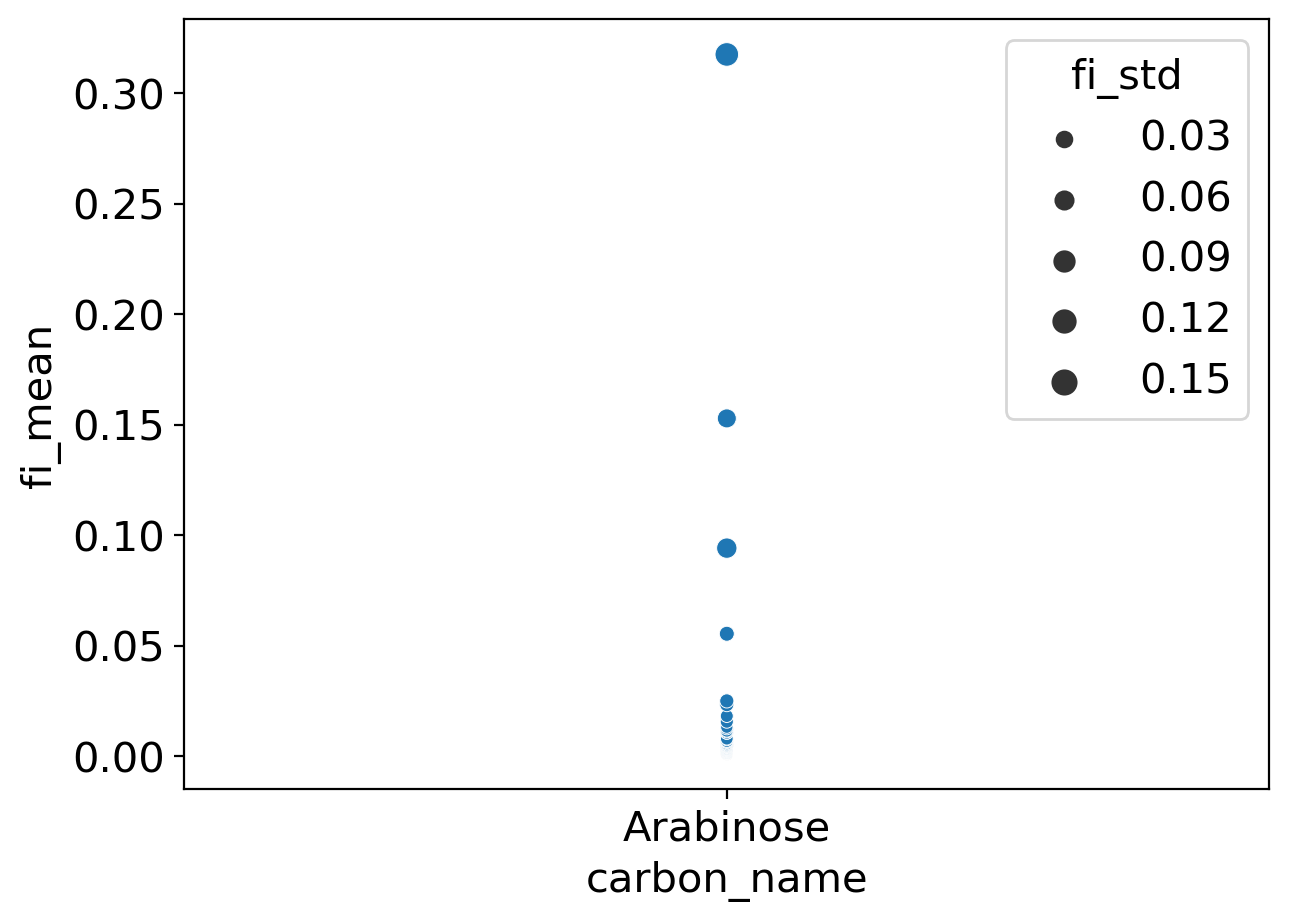

In [ ]:
fi=cal_feature_importance(arab, zeqian['ko_data'].loc[:,arab['selected_features'].iloc[0]]).sort_values(by='fi_mean')

sns.scatterplot(data=fi, y='fi_mean', x='carbon_name',size='fi_std')